In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




# Training data
X_train = np.array([[1.2], [2.4], [3.1], [4.6], [5.3]])
y_train = np.array([0, 0, 0, 1, 1])



# Create an instance of the logistic regression model
logreg = LogisticRegression()




# Fit the logistic regression model to the training data
logreg.fit(X_train, y_train)





# Test data
X_test = np.array([[1.8], [3.5], [4.2]])
y_test = np.array([0, 1, 1])




# Make predictions on the test data
y_pred = logreg.predict(X_test)



# Calculate training and testing accuracy scores
training_accuracy = logreg.score(X_train, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)








# Predict a new value
x_new = np.array([[3.9]])
y_new = logreg.predict(x_new)






# Print the scores and evaluation metrics
print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)

print("Predicted class labels for test data:", y_pred)
print("Predicted class label for a new value (3.9):", y_new)






# Calculate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
#print("Classification Report:")
print(classification_rep)

Training accuracy: 1.0
Testing accuracy: 0.6666666666666666
Predicted class labels for test data: [0 0 1]
Predicted class label for a new value (3.9): [0]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
#Relevant Libraries Import
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
#Dataset Import
df = pd.read_csv("/content/Dataset of Diabetes .csv")

In [ ]:
#data preprocessing Start

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


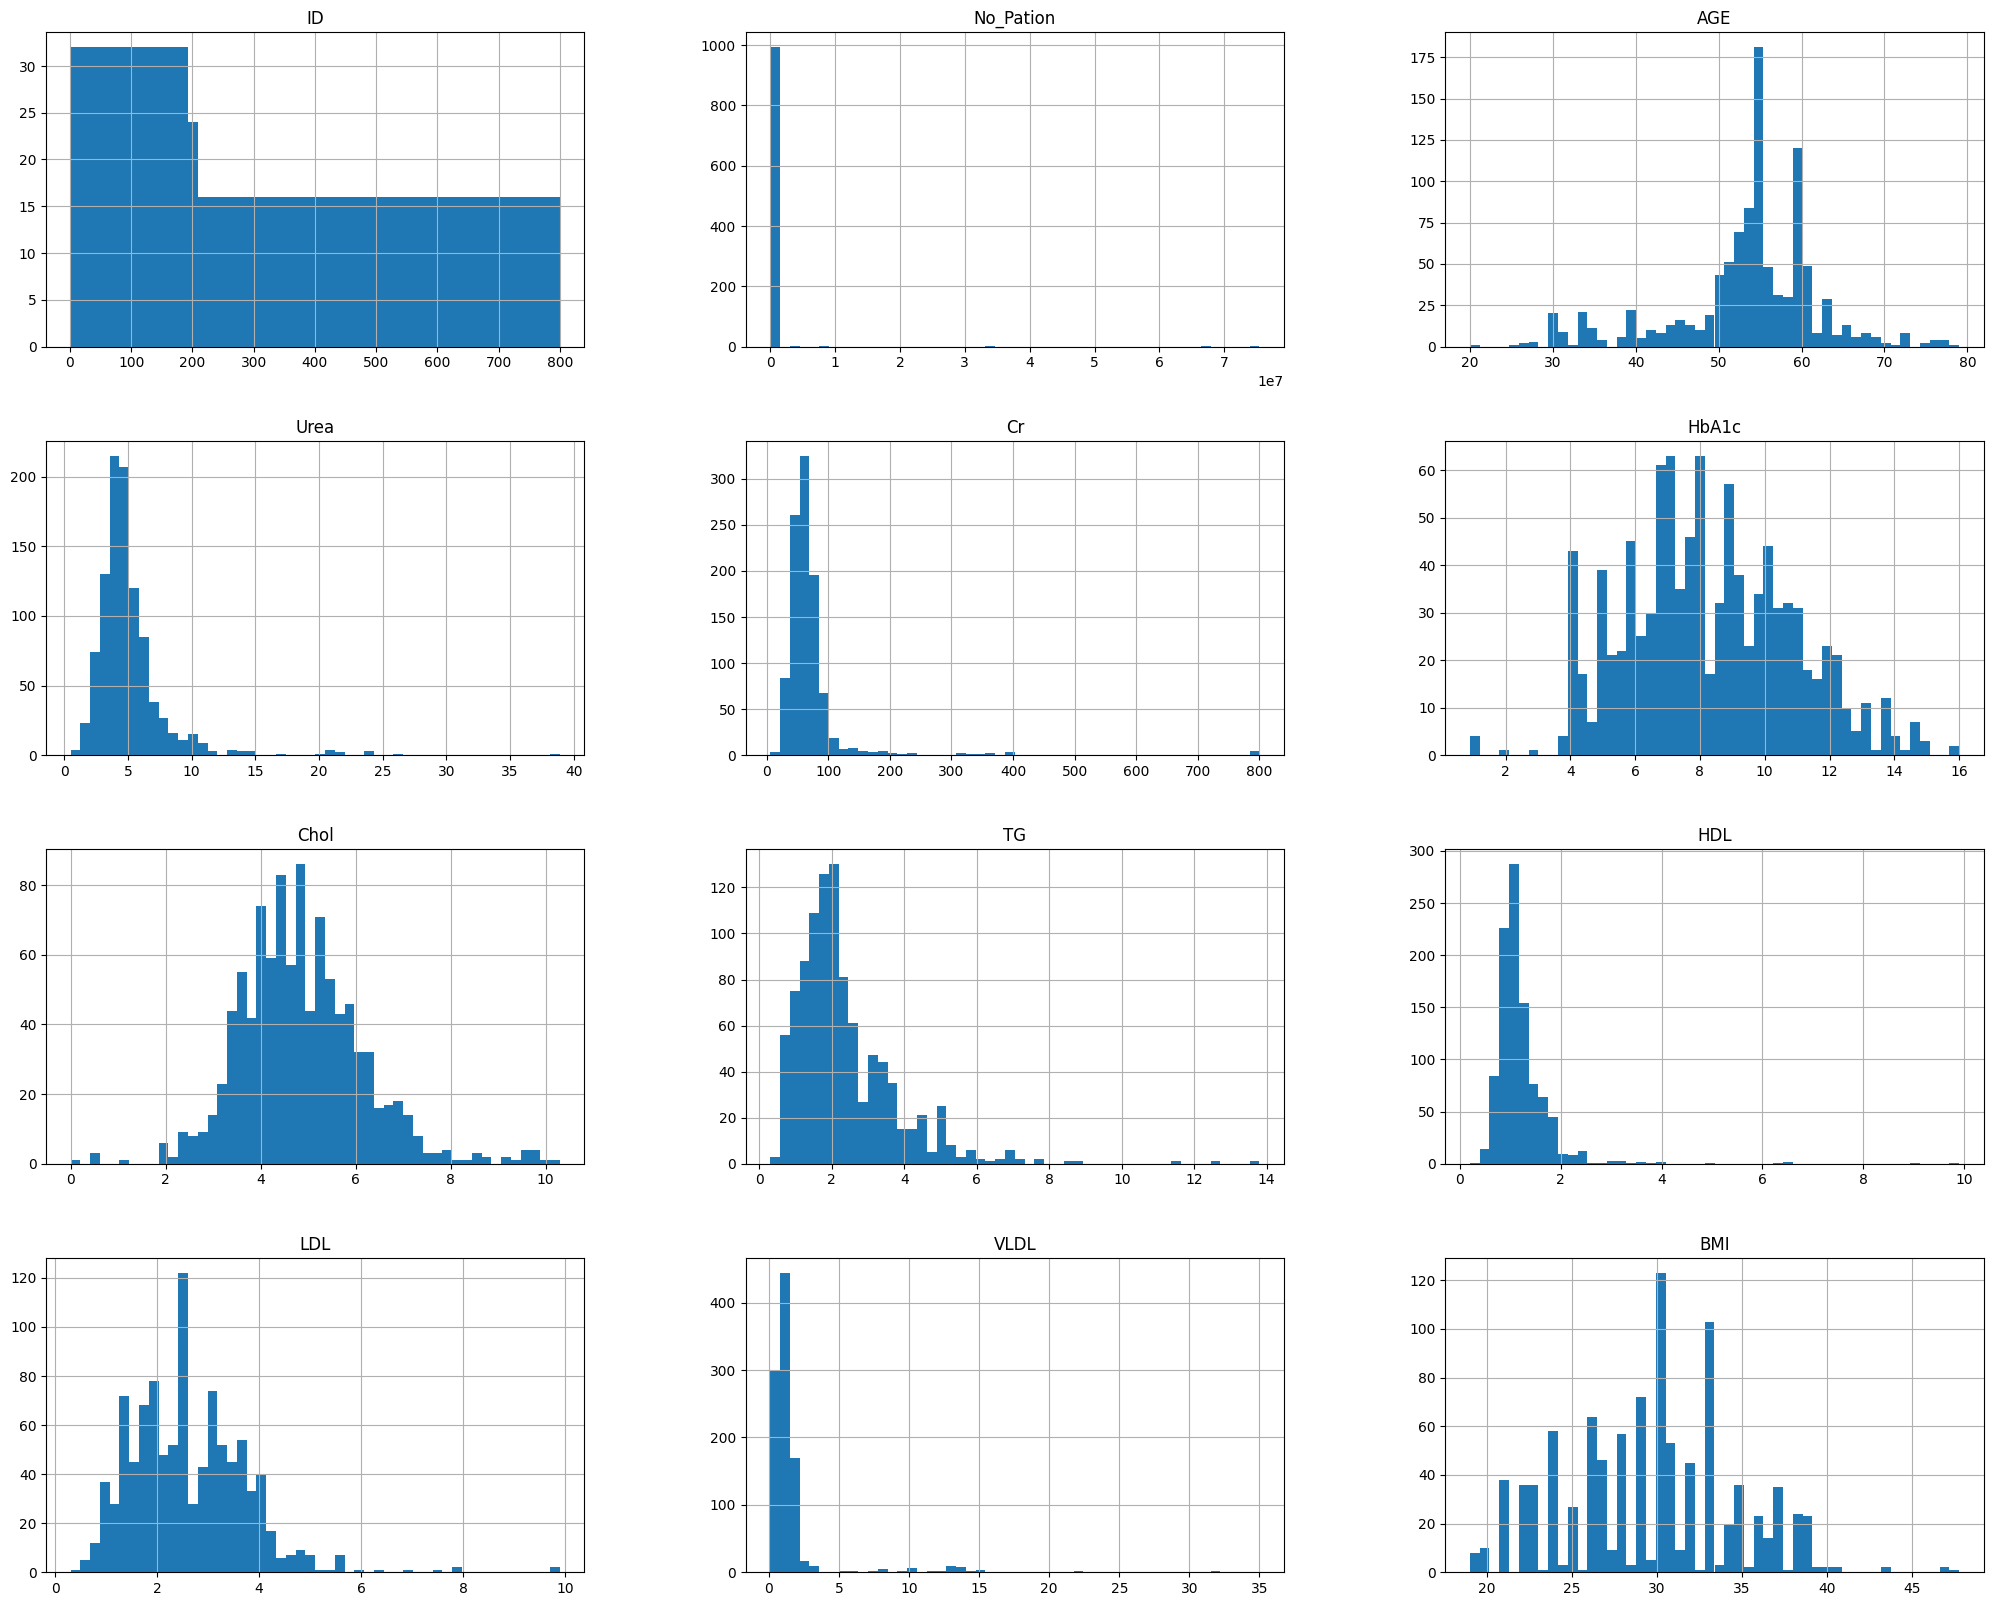

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
df['CLASS'].value_counts()


Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

Replace Simillar Values to Unique Values

In [ ]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")
df['CLASS'] = df['CLASS'].str.replace("Y ","Y")
df['Gender'] = df['Gender'].str.replace("f","F")

In [ ]:
#now check the unique value of gender
df['Gender'].unique()
#df['Gender'].value_counts()

array(['F', 'M'], dtype=object)

In [ ]:
#now check the unique value of gender
df['CLASS'].unique()
df['CLASS'].value_counts()


Y    844
N    103
P     53
Name: CLASS, dtype: int64

information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map

<ipython-input-98-c402f486c940>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


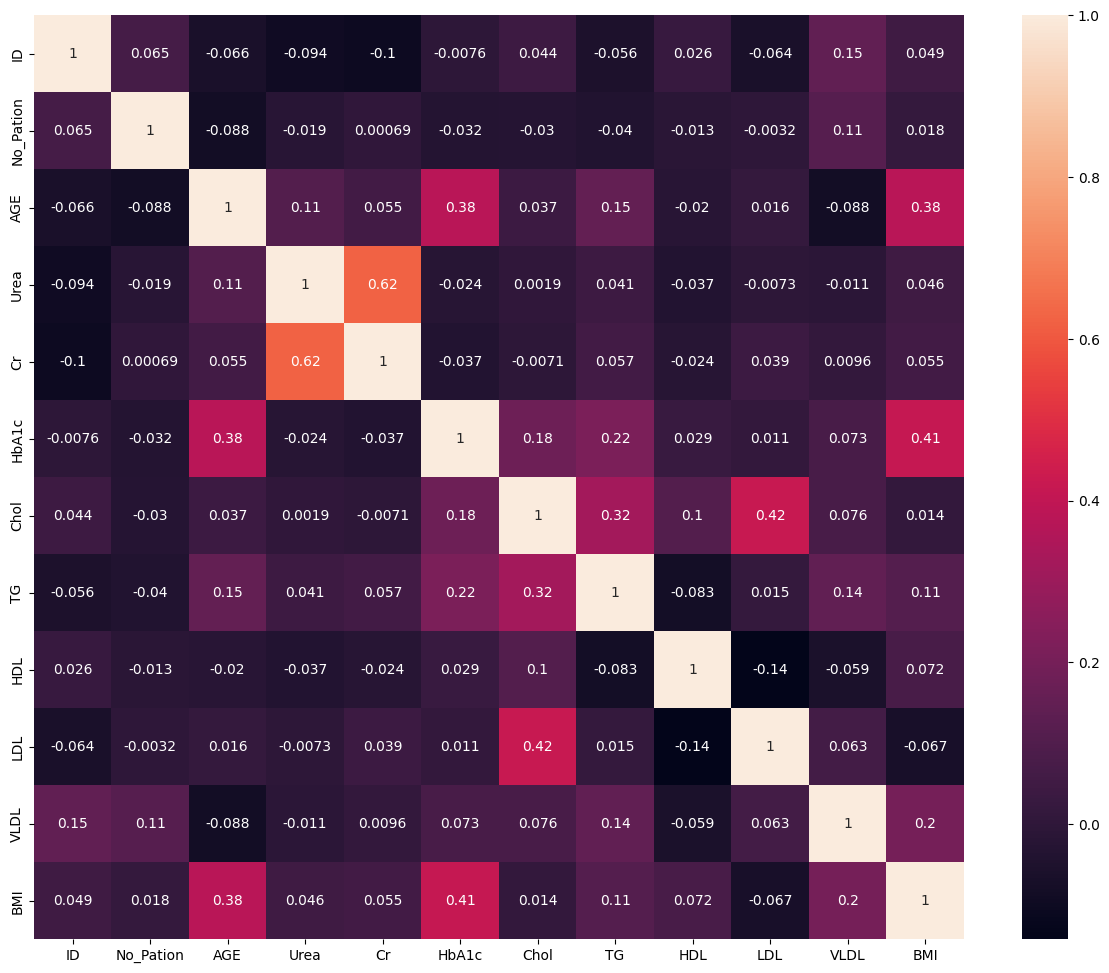

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Label Encoder**

In [ ]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [ ]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


Removing duplicated data points
 if find any



In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 0 duplicates data


finding is null value avilable

In [ ]:
df.isnull().sum()


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

**Creating a test set**

Gaining further insight
**Train test split**

In [ ]:
X = df.drop( 'CLASS', axis=1)
y = df['CLASS']


In [ ]:
y.shape

(1000,)

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:

# logistic regression object
lr = LogisticRegression()
# train the model on train set
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)






the proportion of correctly classified instances out of the total number of instances.

In [ ]:

Accuracy=accuracy_score(y_test, predictions)
print(Accuracy)

0.845


<Axes: >

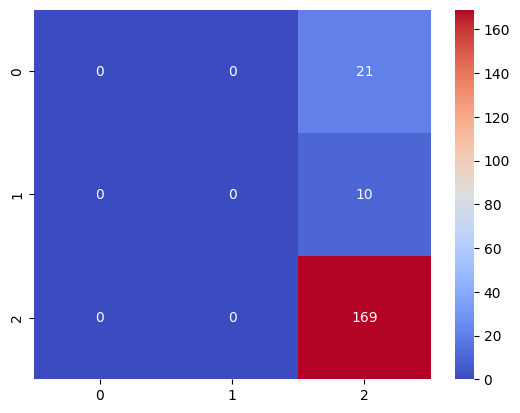

In [ ]:
cm=confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')

all positive prediction er moddha koto gula sothik vabe predict kora gelo.

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions ,average='micro')
print("Precision:", precision)


Precision: 0.845


actuall kotogula truth tar moddha amder model koto sothik predict korse

In [ ]:


recall = recall_score(y_test, predictions ,average='micro')
print("Recall:", recall)






Recall: 0.845


harmonic mean of precision and recall

In [ ]:
f1 = f1_score(y_test, predictions ,average='micro')
print("F1-score:", f1)

F1-score: 0.845


In [ ]:
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        10
           2       0.84      1.00      0.92       169

    accuracy                           0.84       200
   macro avg       0.28      0.33      0.31       200
weighted avg       0.71      0.84      0.77       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Regression metrics

MSE calculates the average squared difference between the predicted and actual values. It penalizes larger errors more than smaller errors.

In [ ]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))


mse= 0.47


the mean squared logarithmic difference between the predicted and actual values

In [ ]:
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))


msle= 0.13494973857997933


the average absolute difference between the predicted and actual values.

In [ ]:
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))



mae= 0.26


R-squared measures the proportion of the variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

In [ ]:
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

rmse= 0.6855654600401044


# Cross-validation techniques

Cross-Validation is a technique used to assess how well our Machine learning models perform on unseen data

In [ ]:
from sklearn import model_selection

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores_lr = cross_val_score(lr, X, y, cv=5)

# Calculating mean accuracy and rounding to two decimal places
mean_accuracy_lr = np.mean(cv_scores_lr) * 100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

# Printing the cross-validation scores and mean accuracy
print("Cross-validation Scores:", cv_scores_lr)
print("Mean Accuracy (%):", mean_accuracy_lr)

Cross-validation Scores: [0.83  0.845 0.845 0.845 0.845]
Mean Accuracy (%): 84.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a KFold object with k=5 (5-fold cross-validation)
kfold = KFold(n_splits=10)

# Performing cross-validation and getting accuracy scores
scores = cross_val_score(rf, X, y, cv=kfold)

# Printing the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Accuracy: {score}")

# Printing the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.01
Fold 2 Accuracy: 0.42
Fold 3 Accuracy: 0.94
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0
Fold 6 Accuracy: 1.0
Fold 7 Accuracy: 1.0
Fold 8 Accuracy: 1.0
Fold 9 Accuracy: 1.0
Fold 10 Accuracy: 1.0
Mean Accuracy: (0.8370000000000001, 2)


HYPERPARAMETER

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.99
